# Quickstart

Once installation is complete you can start running Sarkas. This quickstart guide will walk you through
a simple example in order to check that everything is running smoothly.

The YAML input file can be found at [input_file](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/documentation/Tutorial_NB/input_files/yocp_quickstart.yaml) and this notebook at [notebook](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/documentation/Tutorial_NB/Quickstart.ipynb)


---
## Simulation

In Jupyter notebook you can run the following commands

In [1]:
# Import the usual libraries
%pylab
%matplotlib inline
import os

plt.style.use('MSUstyle')

# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess

Using matplotlib backend: <object object at 0x7fb7385b06f0>
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Create the file path to the YAML input file
input_file_name = os.path.join('input_files', 'yocp_quickstart.yaml')

The above commands imported the required libraries and define the file path to our input file. 

Let's now run the simulation

In [3]:
# pre = PreProcess(input_file_name)
# pre.setup(read_yaml=True)
# pre.run()

In [4]:
# Initialize the Simulation class
sim = Simulation(input_file_name)
# Setup the simulation's parameters
sim.setup(read_yaml=True)
# Run the simulation
sim.run()










 _______  _______  _______  _        _______  _______ 
(  ____ \(  ___  )(  ____ )| \    /\(  ___  )(  ____ \
| (    \/| (   ) || (    )||  \  / /| (   ) || (    \/
| (_____ | (___) || (____)||  (_/ / | (___) || (_____ 
(_____  )|  ___  ||     __)|   _ (  |  ___  |(_____  )
      ) || (   ) || (\ (   |  ( \ \ | (   ) |      ) |
/\____) || )   ( || ) \ \__|  /  \ \| )   ( |/\____) |
\_______)|/     \||/   \__/|_/    \/|/     \|\_______)
                                                      


An open-source pure-python molecular dynamics suite for non-ideal plasmas.




********************************************************************************
                                   Simulation                                   
********************************************************************************

Job ID: yocp_quickstart
Job directory: SarkasSimulations/yocp_quickstart
Simulation directory: 
SarkasSimulations/yocp_quickstart/Simulation

Equilibration dumps directory

  0%|          | 0/10000 [00:00<?, ?it/s]


Equilibration Time: 0 hrs 1 min 25 sec


------------------------------Production------------------------------ 



  0%|          | 0/10000 [00:00<?, ?it/s]


Production Time: 0 hrs 1 min 23 sec

Total Time: 0 hrs 2 min 49 sec


========================= Filesize Estimates =========================

Equilibration:
	Checkpoint filesize: 0 GB 0 MB 85 KB 670 bytes
	Checkpoint folder size: 0 GB 83 MB 662 KB 304 bytes
Production:
	Checkpoint filesize: 0 GB 0 MB 85 KB 670 bytes
	Checkpoint folder size: 0 GB 83 MB 662 KB 304 bytes

Total occupied space: 0 GB 167 MB 300 KB 608 bytes


## Postprocessing

Now that our simulation is complete we need to check if the simulation was physically sound. Run the following three lines will initialize the `PostProcess` class and calculate the observables defined in the input file.

It will also produce a plot of the Temperature and Total Energy of the Production phase. 

In [5]:
# Initialize the Postprocessing class
postproc = PostProcess(input_file_name)
# Read the simulation's parameters and assign attributes
postproc.setup(read_yaml=True)








     _______.     ___      .______       __  ___      ___           _______.
    /       |    /   \     |   _  \     |  |/  /     /   \         /       |
   |   (----`   /  ^  \    |  |_)  |    |  '  /     /  ^  \       |   (----`
    \   \      /  /_\  \   |      /     |    <     /  /_\  \       \   \    
.----)   |    /  _____  \  |  |\  \----.|  .  \   /  _____  \  .----)   |   
|_______/    /__/     \__\ | _| `._____||__|\__\ /__/     \__\ |_______/    
                                                                            


An open-source pure-python molecular dynamics suite for non-ideal plasmas.




********************************************************************************
                                 Postprocessing                                 
********************************************************************************

Job ID: yocp_quickstart
Job directory: SarkasSimulations/yocp_quickstart
PostProcessing directory: 
SarkasSimulations/yocp_quicks

In [6]:
from sarkas.tools.observables import RadialDistributionFunction, Thermodynamics,VelocityAutoCorrelationFunction



=========================== Thermodynamics ===========================
Data saved in: 
 SarkasSimulations/yocp_quickstart/PostProcessing/Thermodynamics/Production/Thermodynamics_yocp_quickstart.h5
Data accessible via: self.dataframe_slices, self.dataframe

Time Series Data:
No. of slices = 1
No. dumps per slice = 1001
Total time: T = 5.0050e-13 [s] ~ 20 plasma periods
Time interval step: dt = 5.0000e-16 ~ 2.0146e-02 plasma period

ACF Data:
No. of acf slices = 1
No. dumps per slice = 500
Largest time lag of the autocorrelation function: tau = 2.5000e-13 [s] ~ 10 plasma periods



Thermodynamics Time: 0 sec 75 msec 179 usec 130 nsec


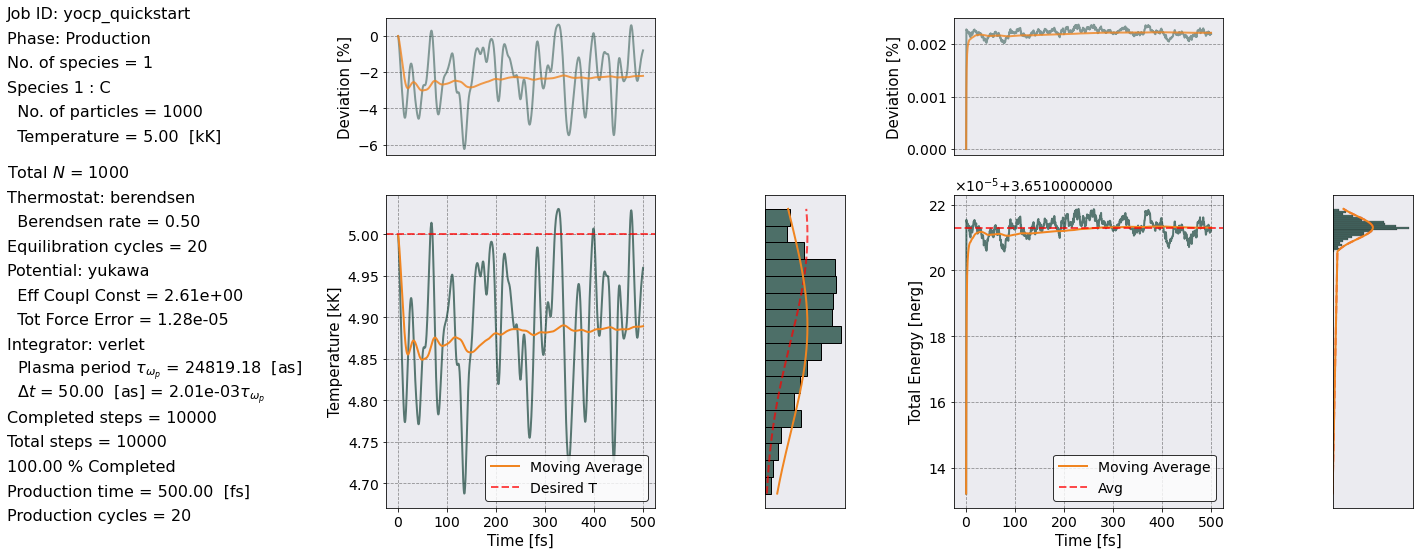

In [7]:
therm = Thermodynamics()
therm.setup(postproc.parameters, phase = "production")
therm.compute()
therm.temp_energy_plot(postproc)

You will notice that both the energy and temperature oscillates wildly. This is fine as long as the percentage deviations, in the top plots, are small. You should have a temperature deviations between -2% to ~ 4-5% while energy deviations between -2% and 1%.


___
## Observables

The most common observable is the radial distribution function. This can be calculated using the following code.

In [8]:
rdf = RadialDistributionFunction()
rdf.setup(postproc.parameters)
rdf.compute()



==================== Radial Distribution Function ====================
Data saved in: 
 SarkasSimulations/yocp_quickstart/PostProcessing/RadialDistributionFunction/Production/RadialDistributionFunction_yocp_quickstart.h5
Data accessible via: self.dataframe_slices, self.dataframe
No. bins = 250
dr = 0.0187 a_ws = 2.4000e-10 [cm]
Maximum Distance (i.e. potential.rc)= 4.6852 a_ws = 6.0000e-08 [cm]
Time Series Data:
No. of slices = 1
No. dumps per slice = 1001
Total time: T = 5.0050e-13 [s] ~ 20 plasma periods
Time interval step: dt = 5.0000e-16 ~ 2.0146e-02 plasma period


Calculating RDF for slice:   0%|          | 0/1 [00:00<?, ?it/s]


Radial Distribution Function Calculation Time: 0 sec 41 msec 513 usec 995 nsec


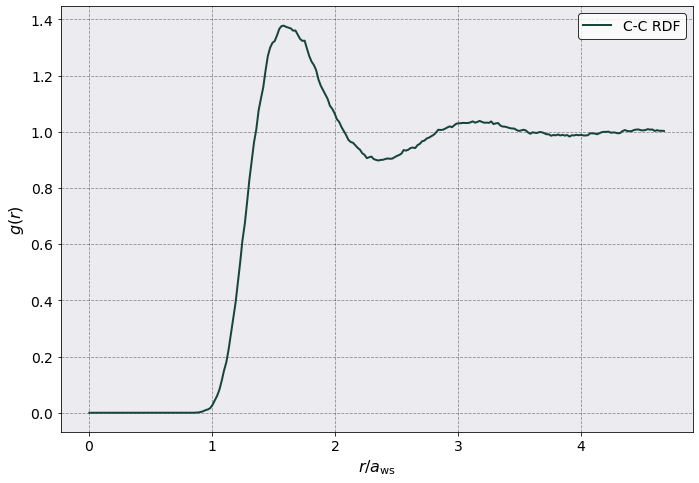

In [9]:
# Initialize the Pair Distribution Function class
ax = rdf.plot(
    scaling=postproc.parameters.a_ws,
    y = [("C-C RDF", "Mean")],
    xlabel = r'$r/a_{\rm ws}$',
    ylabel = r'$g(r)$'
)
ax.legend(["C-C RDF"])

Things to check in here are: 

* Does $g(r)$ go to 1 for large $r$ values ?
* Is there a peak at $r \sim ~1.5 a$ ?
* Is the height of this peak about ~ 1.4?

If the answer to all these question is yes than the simulation was successfull.